#Polynomial Regression with Python by Dr Alvin Ang.ipynb



---


#Step 1: Import All Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



---



#Step 2: Import the Data

In [ ]:
path = 'https://www.alvinang.sg/s/automobileEDA.csv'
df = pd.read_csv(path)
df.sample()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
151,0,91,toyota,std,four,wagon,4wd,front,95.7,0.815473,...,9.0,62.0,4800.0,27,32,8778.0,8.703704,Low,0,1




---



#Step 3: Polynomial Fit  - 3rd Order - X3

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

#we use a polynomial of 3rd order (cubic)

# Y = (-1.557*x3) + (204.8*x2) - (8965*x) + 1.379e+05

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05




---



#Step 4: Define a Plotpolly Function to Set Plotting Parameters

In [ ]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
  
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)
  
  plt.figure(figsize=(20, 15))
  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  
  
  plt.xlabel(Name)
  plt.ylabel('Price of Cars')
  plt.show()
  plt.close()

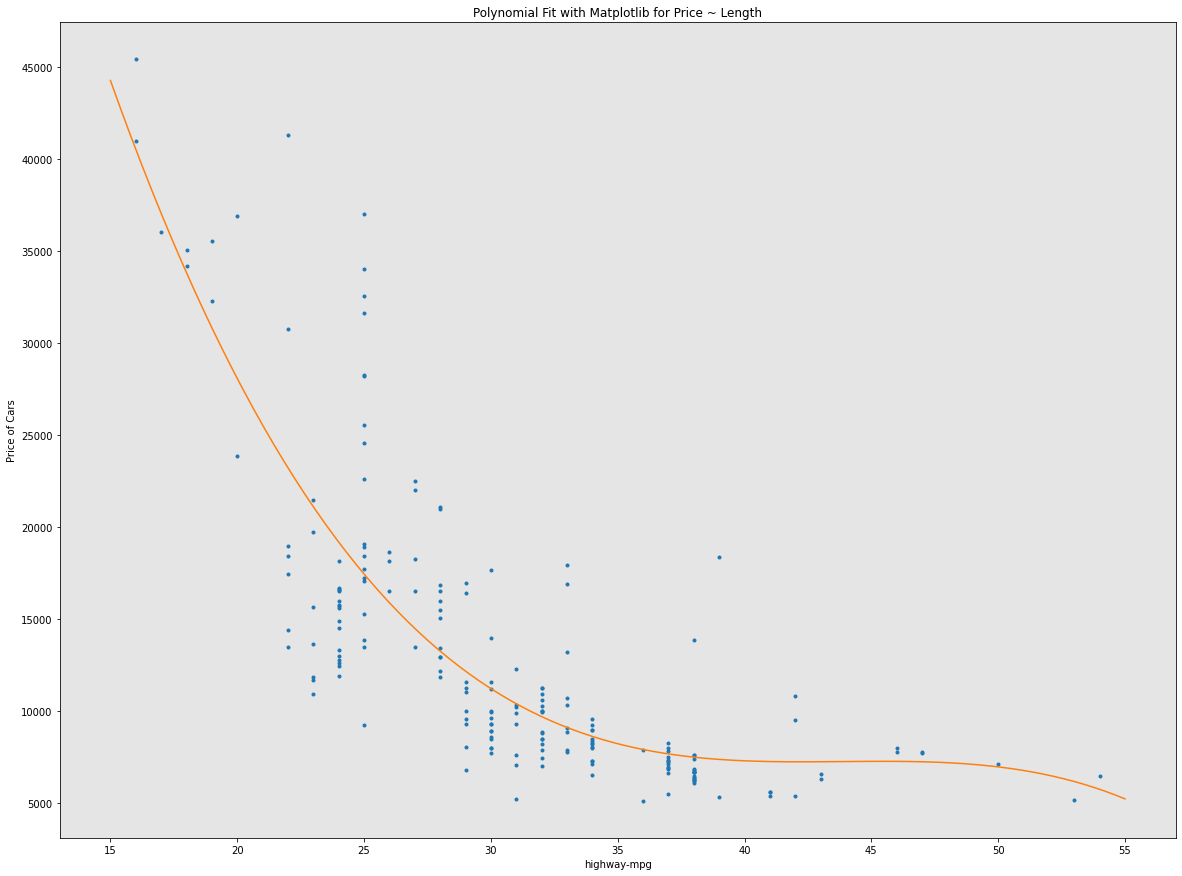

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')



---



#Step 6: Another Way to Obtain the Polynomial Equation

In [ ]:
np.polyfit(x, y, 3)
# Y = (-1.557*x3) + (204.8*x2) - (8965*x) + 1.379e+05

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])



---



#Step 7: Polynomial Fit - Explore X with 11 Degrees

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

#we use a polynomial of 11th order

# Y = (-1.2e-08*X11) + (4.7e-06*X10) - (0.0008028*X9) + (0.08056*X8) 
# - (5.297*X7) + (239.5*X6) - (7588*X5) + (1.684e+05*X4) - (2.565e+06*X3)
# + (2.5e+07*X2) - (1.4e+08*X) + 3.879e+08

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


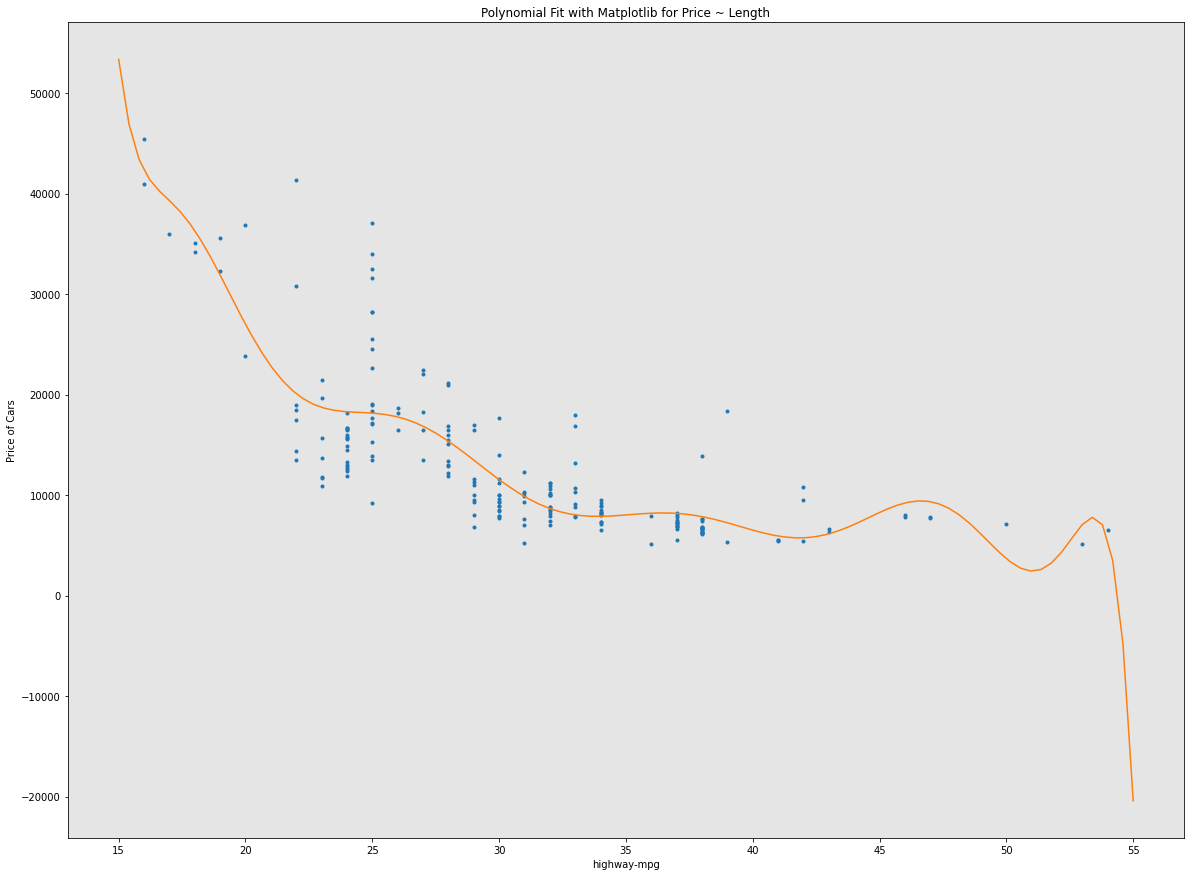

In [ ]:
PlotPolly(p1, x, y, 'highway-mpg')



---



#Step 8: Compute and Compare R2 Scores

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print("The R2 is", r_squared)

#The X3 model fits the data 67%

The R2 is 0.674194666390652


In [ ]:
r_squared_2 = r2_score(y, p1(x))
print("The R2 is", r_squared_2)

#The X11 model fits the data 70%

The R2 is 0.7023769093756598




---



#Step 9: Compuate and Compare MSE Scores

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(df['price'], p(x))

#the MSE for X3 is 20,474,146

20474146.426361218

In [ ]:
mean_squared_error(df['price'], p1(x))

#the MSE for X11 is 18,703,127

18703127.63085496

In [1]:
#Conclusion: X11 seems to be a better model fit. 

#However, comparing their plots, it appears that X11 is overfitting towards the 
#end of the curve



---

#THE END


---

